In [1]:
import numpy as np            
import pandas as pd           
import seaborn as sns         
import matplotlib.pyplot as plt

In [2]:
logD=pd.read_excel('Downloads/aiml_test_data 1.xlsx')

In [3]:
logD.head()

,date,user_id,payment_method,discount_rate,app_time_min,paid_amount
0,2023-01-01,U416,Card,0.0,10,68761
1,2023-01-01,U211,Card,0.2,15,40584
2,2023-01-01,U460,Transfer,0.0,10,32412
3,2023-01-01,U219,Card,0.2,15,38660
4,2023-01-01,U239,Pay,0.0,10,48964


In [4]:
logD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48809 entries, 0 to 48808
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            48809 non-null  datetime64[ns]
 1   user_id         48809 non-null  object        
 2   payment_method  46392 non-null  object        
 3   discount_rate   48809 non-null  float64       
 4   app_time_min    48809 non-null  int64         
 5   paid_amount     48809 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
logD.describe()

,date,discount_rate,app_time_min,paid_amount
count,48809,48809.000000,48809.000000,48809.000000
mean,2023-09-05 09:30:13.755659776,0.052253,14.012682,51511.304124
min,2023-01-01 00:00:00,0.000000,10.000000,2000.000000
25%,2023-05-11 00:00:00,0.000000,10.000000,36717.000000
50%,2023-09-09 00:00:00,0.000000,10.000000,47704.000000
75%,2023-12-30 00:00:00,0.100000,15.000000,58626.000000
max,2024-04-30 00:00:00,0.300000,30.000000,143322.000000
std,NaN,0.097245,6.675307,23242.668148


In [6]:
logD.isnull().sum()

date                 0
user_id              0
payment_method    2417
discount_rate        0
app_time_min         0
paid_amount          0
dtype: int64

In [7]:
logD.value_counts('payment_method')

payment_method
Card        27783
Pay         14006
Transfer     4603
Name: count, dtype: int64

In [8]:
logD['payment_method'].fillna('Transfer', inplace=True) #null행 조회시 다른 칼럼에 이상치 없음 -> payment_method의 null을 transfer로 변경

/var/folders/39/w7vj51w146q44x8648j5kt6r0000gn/T/ipykernel_46164/3135924910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  logD['payment_method'].fillna('Transfer', inplace=True) #null행 조회시 다른 칼럼에 이상치 없음 -> payment_method의 null을 transfer로 변경


In [9]:
logD.value_counts('payment_method') #null 포함되어 tranfer수치 증가

payment_method
Card        27783
Pay         14006
Transfer     7020
Name: count, dtype: int64

In [10]:
logD.isnull().sum()

date              0
user_id           0
payment_method    0
discount_rate     0
app_time_min      0
paid_amount       0
dtype: int64

In [20]:
logD['date'] = pd.to_datetime(logD['date'])
splited1 = logD[(logD['date'] >= '2023-01-01') & (logD['date'] <= '2024-03-31')]

In [21]:
splited2 = logD[(logD['date'] >= '2024-04-01') & (logD['date'] <= '2024-04-30')]

In [22]:
splited2

,date,user_id,payment_method,discount_rate,app_time_min,paid_amount
45818,2024-04-01,U227,Card,0.0,10,51159
45819,2024-04-01,U321,Pay,0.1,15,36047
45820,2024-04-01,U040,Transfer,0.0,10,66574
45821,2024-04-01,U122,Card,0.0,10,69097
45822,2024-04-01,U021,Card,0.0,10,69881
...,...,...,...,...,...,...
48804,2024-04-30,U123,Transfer,0.0,10,60463
48805,2024-04-30,U289,Card,0.0,10,57987
48806,2024-04-30,U313,Pay,0.0,10,46883
48807,2024-04-30,U371,Transfer,0.0,30,107190


In [23]:
splited1 = splited1.rename(columns={'paid_amount': 'DailySUM'}) #칼럼명 DailySUM으로 변경

In [24]:
splited2 = splited2.rename(columns={'paid_amount': 'DailySUM'}) #칼럼명 DailySUM으로 변경

In [25]:
splited1= splited1.groupby('date')['DailySUM'].sum() #일자별 총매출
splited1.head()

date
2023-01-01    5801891
2023-01-02    4194458
2023-01-03    3920393
2023-01-04    3905942
2023-01-05    3697177
Name: DailySUM, dtype: int64

In [26]:
splited2= splited2.groupby('date')['DailySUM'].sum() #일자별 총매출
splited2.head()

date
2024-04-01    4612938
2024-04-02    4310195
2024-04-03    4330592
2024-04-04    4641251
2024-04-05    4236435
Name: DailySUM, dtype: int64

In [27]:
splited1.to_csv('Downloads/xbgtrain.csv', index='date')

In [28]:
splited2.to_csv('Downloads/xgbtest.csv', index='date')

In [29]:
training=pd.read_csv('Downloads/xbgtrain.csv')

In [30]:
training.tail()

,date,DailySUM
451,2024-03-27,5088508
452,2024-03-28,4816215
453,2024-03-29,4814699
454,2024-03-30,6268769
455,2024-03-31,6012321


In [31]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      456 non-null    object
 1   DailySUM  456 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.3+ KB


In [32]:
testing=pd.read_csv('Downloads/xgbtest.csv')
testing.tail()

,date,DailySUM
25,2024-04-26,5032277
26,2024-04-27,7899112
27,2024-04-28,5879447
28,2024-04-29,5210012
29,2024-04-30,4699500


In [33]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      30 non-null     object
 1   DailySUM  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [34]:
training = training.set_index("date")
training.index = pd.to_datetime(training.index)
training.head()

,DailySUM
date,
2023-01-01,5801891
2023-01-02,4194458
2023-01-03,3920393
2023-01-04,3905942
2023-01-05,3697177


In [35]:
testing = testing.set_index("date")
testing.index = pd.to_datetime(testing.index)
testing.head()

,DailySUM
date,
2024-04-01,4612938
2024-04-02,4310195
2024-04-03,4330592
2024-04-04,4641251
2024-04-05,4236435


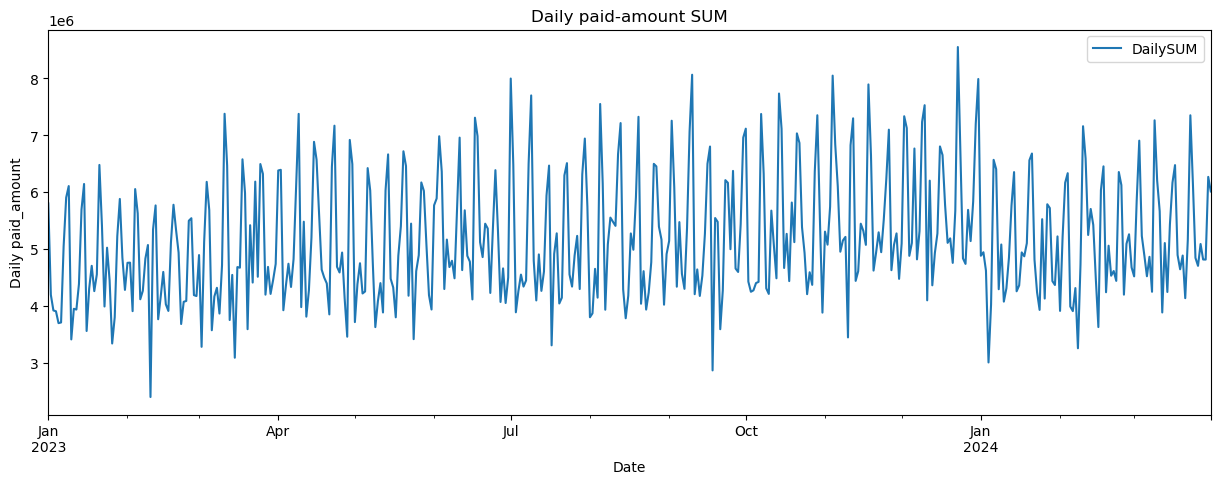

In [36]:

ax = training.plot(                 
    figsize=(15, 5),              # Set the figure size to 15 inches wide by 5 inches tall
    title="Daily paid-amount SUM" 
)

ax.set_xlabel("Date")
ax.set_ylabel("Daily paid_amount")

plt.show()

In [46]:
def create_features(training):
    # Existing features
    training = training.copy()
    training["dayofweek"] = training.index.dayofweek
    training["quarter"] = training.index.quarter
    training["month"] = training.index.month
    training["dayofyear"] = training.index.dayofyear
    
    # Additional features
    training["dayofmonth"] = training.index.day              # Day of the month (1 to 31)
    training["weekofyear"] = training.index.isocalendar().week  # Week of the year (1 to 52)
    training["is_weekend"] = training.index.dayofweek >= 5    # Binary feature for weekends (1 if weekend, else 0)
    training["is_month_start"] = training.index.is_month_start # Binary feature for start of month
    training["is_month_end"] = training.index.is_month_end     # Binary feature for end of month
    training["is_quarter_start"] = training.index.is_quarter_start # Binary feature for start of quarter
    training["is_quarter_end"] = training.index.is_quarter_end     # Binary feature for end of quarter

    # Cyclical features (useful for capturing seasonality patterns)
    training["sin_dayofweek"] = np.sin(2 * np.pi * training["dayofweek"] / 7)  # Sine transformation for day of the week
    training["cos_dayofweek"] = np.cos(2 * np.pi * training["dayofweek"] / 7)  # Cosine transformation for day of the week
    training["sin_month"] = np.sin(2 * np.pi * training["month"] / 12)  # Sine transformation for month
    training["cos_month"] = np.cos(2 * np.pi * training["month"] / 12)  # Cosine transformation for month
    
    return training
train = create_features(training)

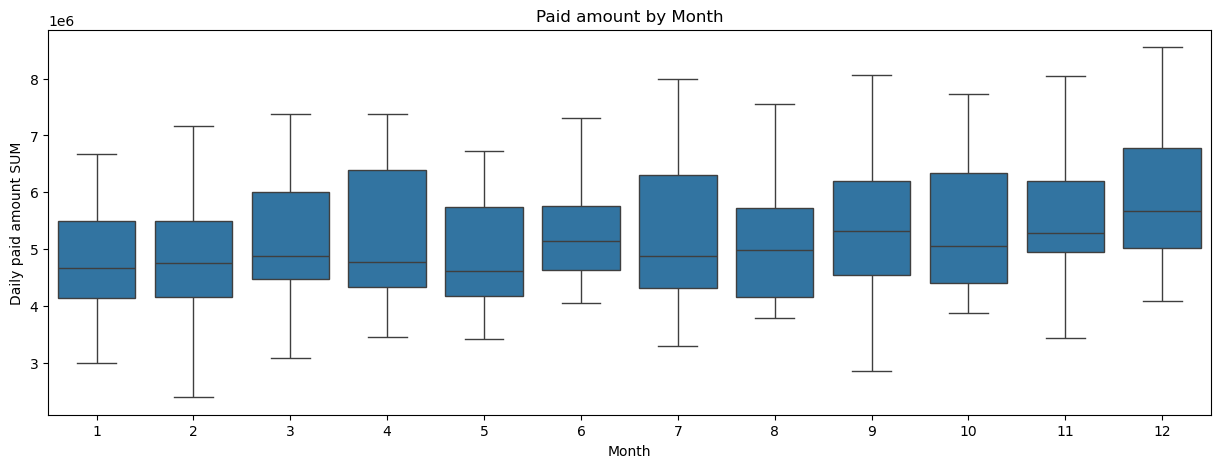

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))  
sns.boxplot(data=train, x="month", y="DailySUM", ax=ax)  # Pass ax to sns.boxplot
ax.set_title("Paid amount by Month")
ax.set_xlabel("Month")  
ax.set_ylabel("Daily paid amount SUM")  
plt.show()

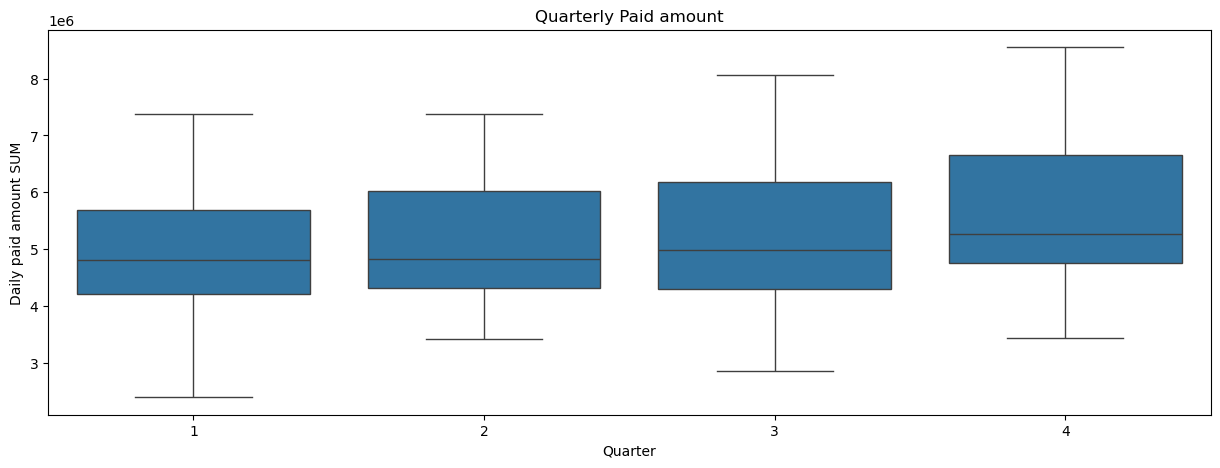

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))  
sns.boxplot(data=train, x="quarter", y="DailySUM", ax=ax)  # Pass ax to sns.boxplot
ax.set_title("Quarterly Paid amount")
ax.set_xlabel("Quarter")  
ax.set_ylabel("Daily paid amount SUM")  
plt.show()

In [49]:
# pip install xgboost
import xgboost as xgb
from xgboost import plot_importance, plot_tree  
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [50]:
training = create_features(training)
testing = create_features(testing)

# Define features and target
TARGET = "DailySUM"
FEATURES = [
     "dayofweek", "quarter", "month", "dayofyear","dayofmonth", 
    "weekofyear", "is_weekend", "is_month_start", "is_month_end",
    "is_quarter_start", "is_quarter_end", 
    "sin_dayofweek", "cos_dayofweek",
    "sin_month", "cos_month"
]

X_train = training[FEATURES]
y_train = training[TARGET]
X_test = testing[FEATURES]
y_test = testing[TARGET]

Test RMSE: 679349.168448744


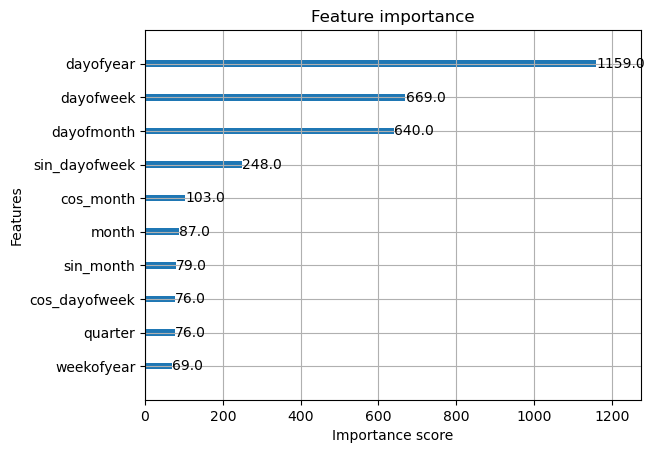

In [51]:
# The 'objective' is set to 'reg:squarederror' by default for regression tasks
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

# Plot feature importance
# Visualize the top 10 most important features to understand which features contributed most to the model's predictions

xgb.plot_importance(xgb_reg, importance_type="weight", max_num_features=10)
plt.show()

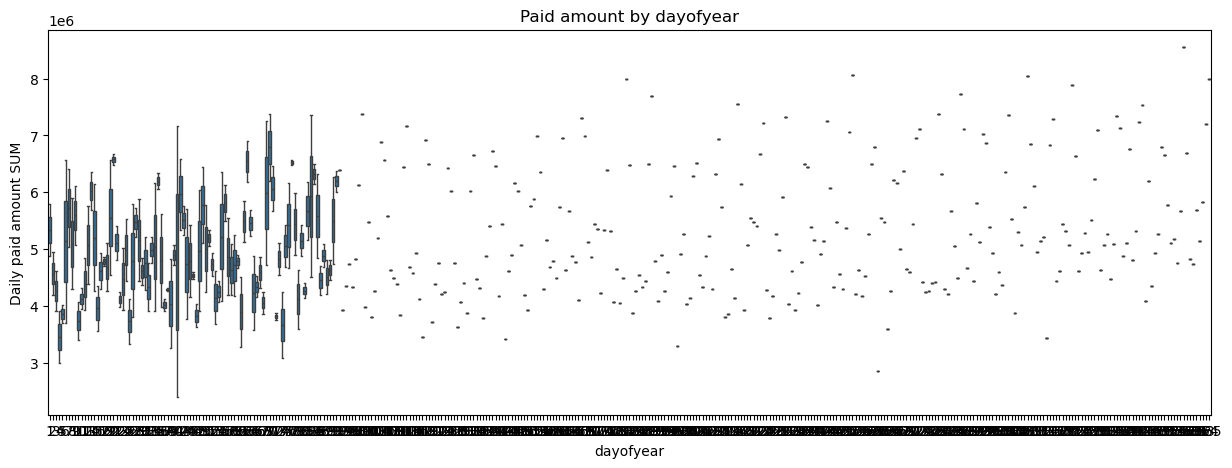

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))  
sns.boxplot(data=train, x="dayofyear", y="DailySUM", ax=ax)  
ax.set_title("Paid amount by dayofyear") #most important feature: dayofyear!!!
ax.set_xlabel("dayofyear")  
ax.set_ylabel("Daily paid amount SUM")  
plt.show()

In [53]:
# Make predictions on the test set and add them as a new column in test
test['DailySUM_predict'] = xgb_reg.predict(X_test)

In [54]:
test.head()

,DailySUM,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,is_weekend,is_month_start,is_month_end,is_quarter_start,sin_dayofweek,cos_dayofweek,sin_month,cos_month,DailySUM_predict
date,,,,,,,,,,,,,,,,
2024-04-01,4612938,0,2,4,92,1,14,False,True,False,True,0.000000,1.000000,0.866025,-0.5,3928900.25
2024-04-02,4310195,1,2,4,93,2,14,False,False,False,False,0.781831,0.623490,0.866025,-0.5,4178239.50
2024-04-03,4330592,2,2,4,94,3,14,False,False,False,False,0.974928,-0.222521,0.866025,-0.5,4601156.00
2024-04-04,4641251,3,2,4,95,4,14,False,False,False,False,0.433884,-0.900969,0.866025,-0.5,4323666.50
2024-04-05,4236435,4,2,4,96,5,14,False,False,False,False,-0.433884,-0.900969,0.866025,-0.5,4617653.00


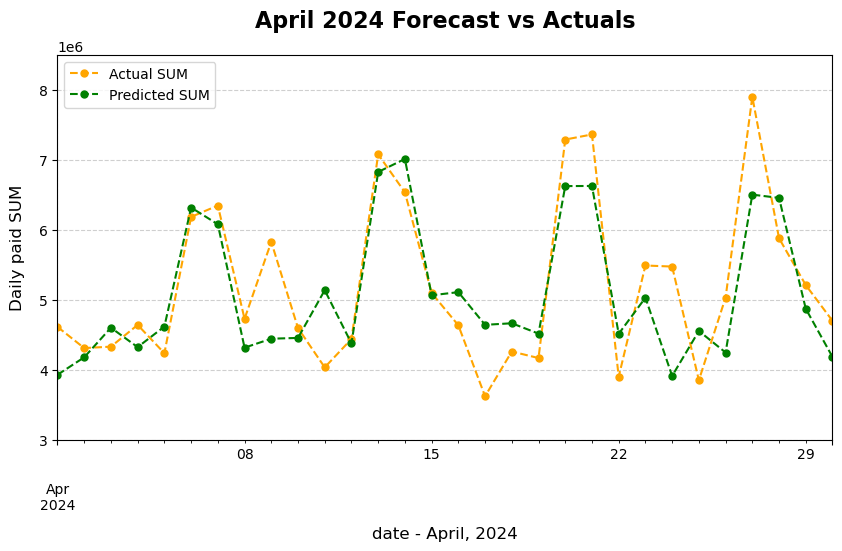

In [55]:


# Concatenate the test set with predictions and the training set
#All16months = pd.concat([train, test], axis=1)

fig, ax = plt.subplots(figsize=(10, 5))

test['DailySUM'].plot(
    ax=ax,
    color='orange',        # Color for actual values (orange)
    linestyle='--',          # No line connecting points
    marker='o',            # Use dots for actual values
    markersize=5,
    label='Actual SUM'
)

test['DailySUM_predict'].plot(
    ax=ax,
    color='green',          # Color for predicted values (green)
    linestyle='--',          # No line connecting points
    marker='o',            # Use dots for predicted values
    markersize=5,
    label='Predicted SUM'
)

# Set x-axis limits to focus on Tested month(April,2024)
ax.set_xbound(lower='2024-04-01', upper='2024-04-30')

# Set y-axis limits for better scaling
ax.set_ylim(3000000, 8500000)

# Add labels and title
ax.set_xlabel("date - April, 2024", fontsize=12, labelpad=10)
ax.set_ylabel("Daily paid SUM", fontsize=12, labelpad=10)
ax.set_title("April 2024 Forecast vs Actuals", fontsize=16, fontweight='bold', pad=20)

# Add a legend with custom titles
ax.legend(loc="upper left", frameon=True, fontsize=10)

# Enable grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [56]:
from sklearn.metrics import root_mean_squared_error
# Function for Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate error MAPE on the test set
rmse = root_mean_squared_error(y_true=test['DailySUM'], y_pred=test['DailySUM_predict'])
mae = mean_absolute_error(y_true=test['DailySUM'], y_pred=test['DailySUM_predict'])
mape = mean_absolute_percentage_error(y_true=test['DailySUM'], y_pred=test['DailySUM_predict'])

print(f" RMSE error is {rmse:.2f}")
print(f" MAE error is {mae:.2f}")
print(f" MAPE error is {mape:.2f}%")

 RMSE error is 679349.19
 MAE error is 554875.44
 MAPE error is 10.96%
